# Group Members:
* Sergio Hernandez Lopez
* Peyman Kor
* Emmanuel Obeng-Ankoana Yaafi

# Part 1



[transactions.csv](https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv)

## Load Packages:

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import requests
import json
from datetime import datetime

### Data retrieved and peep at the top

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/patrickcording/02807-comp-tools/master/docker/work/data/transactions.csv')
df.head(5) 


,part,company,country,city,price,date
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20568 entries, 0 to 20567
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   part     20558 non-null  object
 1   company  20568 non-null  object
 2   country  18397 non-null  object
 3   city     20535 non-null  object
 4   price    20567 non-null  object
 5   date     20568 non-null  object
dtypes: object(6)
memory usage: 964.2+ KB


In [6]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 20568, Columns: 6


#### The data is various companies in different countries and the dates unspecified products were sold. 
#### The data has 20568 rows and 6 columns. We will subsequently check the unusable entries according to each column. 
#### The obviously large number of rows make manual identification of wrong entries difficult to examine. We will use the tools available to us to examine, evaluate and manupulate the data so that we can transform the data to suit our purpose. 


In [10]:
df.isnull().sum(axis=0)


part         10
company       0
country    2171
city         33
price         1
date          0
dtype: int64

### The entries in the column 'part' appears to be nominal in nature. We have therefore decided to simply remove any null entry by rows.

In [11]:
df.dropna(subset= ['part'], inplace=True)

In [12]:
df.isnull().sum(axis=0)

part          0
company       0
country    2171
city         33
price         1
date          0
dtype: int64

### It can be seen that 'part' column no longer has null entries. We now move our attention to the column country. 

## We turn our attention to the 'company' column


In [13]:
df1 = df['company'].value_counts(dropna = False)

In [14]:
df1.sort_index()


 -                  1
 a                  1
Avaveo            212
Brainsphere      1241
Bubblemix          54
Buzzbean         1253
Chatterbridge    1589
Eimbee            498
Flipstorm        1193
Gabcube           356
Gabtune            27
Gevee              36
Innojam            44
Kanoodle          127
Laj0                1
Lajo              219
Ntags            1514
Ntagz               1
Realpoint         158
Rhycero           204
Riffpath          151
Roodel            626
Shufflebeat      1553
Tagtune            12
Teklist           428
Thoughtmix       2794
Thoughtmixz         1
Twitterbeat      2267
Voomm             250
Wordify           968
Yozio             653
Zoonder           453
Zooxo            1670
Zooxo.              2
aa                  1
Name: company, dtype: int64

#### From the output above, we have do some manupulation by replacing companies with almost equal names with the likeliest. 

In [15]:
df['company']=df['company'].str.replace('Laj0','Lajo')
df['company']=df['company'].str.replace('Ntagz','Ntags')
df['company']=df['company'].str.replace('Thoughtmixz','Thoughtmix')
df['company']=df['company'].str.replace('Zooxo.','Zooxo')
df1 = df['company'].value_counts(dropna = False)
df1.sort_index()


 -                  1
 a                  1
Avaveo            212
Brainsphere      1241
Bubblemix          54
Buzzbean         1253
Chatterbridge    1589
Eimbee            498
Flipstorm        1193
Gabcube           356
Gabtune            27
Gevee              36
Innojam            44
Kanoodle          127
Lajo              220
Ntags            1515
Realpoint         158
Rhycero           204
Riffpath          151
Roodel            626
Shufflebeat      1553
Tagtune            12
Teklist           428
Thoughtmix       2795
Twitterbeat      2267
Voomm             250
Wordify           968
Yozio             653
Zoonder           453
Zooxo            1672
aa                  1
Name: company, dtype: int64

#### From the above information, we can deduce that companies '-', 'a', and 'aa' may represent given companies in their own right but we in no way able to know that. We can do further checks.

In [16]:
company_aa = df[df['company'] == 'aa']
company_aa





,part,company,country,city,price,date
13841,51346-145,aa,United States,New York,$1059.38,2017-12-16 20:02:15


In [17]:
company_a = df[df['company'] == ' a'] 
company_a

,part,company,country,city,price,date
13840,37205-992,a,United States,New York,$395.3,2017-12-16 18:59:53


In [18]:
companydash = df[df['company'] == ' -']
companydash

,part,company,country,city,price,date
13839,17156-617,-,United States,Boston,$1168.82,2017-12-16 17:55:55


In [19]:
weird = pd.concat([company_aa, company_a, companydash])

In [20]:
pd.merge(df, weird)

,part,company,country,city,price,date
0,17156-617,-,United States,Boston,$1168.82,2017-12-16 17:55:55
1,37205-992,a,United States,New York,$395.3,2017-12-16 18:59:53
2,51346-145,aa,United States,New York,$1059.38,2017-12-16 20:02:15


#### Now, what we can do is that we look at the all the companies who's city is New York, and we find the the only possible company is 'Wordify'


In [21]:
df1=df[df.city =='New York']
df1.company.value_counts(dropna = False)

Wordify    966
 a           1
aa           1
Name: company, dtype: int64

In [22]:
df['company']=df['company'].str.replace(' a','Wordify')
df['company']=df['company'].str.replace('aa','Wordify')

#### Do the same approach for the Boston:

In [23]:
df1 = df[df.city == 'Boston']
df1.company.value_counts()

Zoonder    452
 -           1
Name: company, dtype: int64

In [24]:
df['company']=df['company'].str.replace(' -','Zoonder')
df1 = df['company'].value_counts(dropna = False)
df1.sort_index()

Avaveo            212
Brainsphere      1241
Bubblemix          54
Buzzbean         1253
Chatterbridge    1589
Eimbee            498
Flipstorm        1193
Gabcube           356
Gabtune            27
Gevee              36
Innojam            44
Kanoodle          127
Lajo              220
Ntags            1515
Realpoint         158
Rhycero           204
Riffpath          151
Roodel            626
Shufflebeat      1553
Tagtune            12
Teklist           428
Thoughtmix       2795
Twitterbeat      2267
Voomm             250
Wordify           970
Yozio             653
Zoonder           454
Zooxo            1672
Name: company, dtype: int64

#### Now, the company part is almost cleaned and is in the usable format, let's move and have a look on country section: 

In [25]:
df1 = df['country'].value_counts(dropna = False)
df1.sort_index()

France            3462
Germany           1124
Greece            1627
Japan              159
Netherlands        427
Portuga              5
Portugal          7379
Spain             1425
Switzerland         11
Tyskland             1
US                   1
United Kingdom    1511
United States     1255
NaN               2171
Name: country, dtype: int64

#### It is determined countries have a huge number of null values and to use dropna module, we will significantly reduce the number of observations. Our next tasks are to utilise the tools available to use to reduce the number of null values while we keep the reduction of the number of the observations at the minimum. 

#### Quickly resolving the obvious ones. 

In [26]:
df['country']=df['country'].str.replace('Portugal','TrueCountry')
df['country']=df['country'].str.replace('Portuga','Portugal')
df['country']=df['country'].str.replace('TrueCountry','Portugal')
df['country']=df['country'].str.replace('US','United States')
df['country']=df['country'].str.replace('Tyskland','Germany')
df['city']=df['city'].str.replace('Amadora\t','Amadora')
df1 = df['country'].value_counts(dropna=False)
df1.sort_index()


France            3462
Germany           1125
Greece            1627
Japan              159
Netherlands        427
Portugal          7384
Spain             1425
Switzerland         11
United Kingdom    1511
United States     1256
NaN               2171
Name: country, dtype: int64

#### Now, we have about 2000 NaN country names, to figure out them we use the the city column and map the country based on it's corrosponding city names, therefore the condistions and choice help us to solvee this issue using the np.select.

In [32]:
def mapcountry(df):
  conditions = [
    (df['city'] == 'Amadora'),
    (df['city'] == 'Annecy'),
    (df['city'] == 'Lisbon'),
    (df['city'] == 'Porto'),
    (df['city'] == 'Barcelona'),
    (df['city'] == 'London'),
    (df['city'] == 'Düsseldorf'),
    (df['city'] == 'Braga'),
    (df['city'] == 'New York'),
    (df['city'] == 'Athens'),
    (df['city'] == 'Aranhas'),
    (df['city'] == 'Patras'),
    (df['city'] == 'Boston'),
    (df['city'] == 'Nanterre'),
    (df['city'] == 'Amiens'),
    (df['city'] == 'Arnhem'),
    (df['city'] == 'Almada'),
    (df['city'] == 'Nice'),
    (df['city'] == 'Paris'),
    (df['city'] == 'Arcueil'),
    (df['city'] == 'Heraklion'),
    (df['city'] == 'Thessaloniki'),
    (df['city'] == 'Niihama'),
    (df['city'] == 'Nice'),
    (df['city'] == 'Asaka'),
    (df['city'] == 'Amsterdam'),
    (df['city'] == 'Lisbon'),
    (df['city'] == 'Lyon'),
    (df['city'] == 'Champagnole'),
    (df['city'] == 'Zürich')]
  choices = ['Portugal', 'France', 'Portugal','Portugal','Spain',
           'United Kingdom','Germany','Portugal','United States',
           'Greece','Portugal','Greece','United States','France',
           'France','Netherlands','Spain','France','France','France','Greece',
           'Greece','Japan','France','Japan','Netherlands','Purtgal',
           'France','France','Switzerland']
  df['country'] = np.select(conditions, choices, default =df['country']) #'Purtgal'
  return df


In [33]:
df = mapcountry(df)

In [34]:
df.isnull().sum(axis=0)

part       0
company    0
country    0
city       0
price      1
date       0
dtype: int64

#### Now, we have around the 33 Nan for the city names, yet we have the representative company- again we use the same as previous approcah to get the city based on the company names.

In [30]:
conditions = [
    (df['company'] == 'Thoughtmix'),
    (df['company'] == 'Ntags'),
    (df['company'] == 'Brainsphere'),
    (df['company'] == 'Shufflebeat'),
    (df['company'] == 'Zooxo'),
    (df['company'] == 'Yozio'),
    (df['company'] == 'Teklist'),
    (df['company'] == 'Wordify'),
    (df['company'] == 'Zoonder'),
    (df['company'] == 'Twitterbeat'),
    (df['company'] == 'Kanoodle')]
choices = ['Amadora', 'Lisbon', 'Braga','Porto','London',
           'Patras','Arnhem','New York','Boston',
           'Annecy','Niihama']
df['city'] = np.select(conditions, choices, default =df['city'])

In [35]:
df.isnull().sum(axis=0)

part       0
company    0
country    0
city       0
price      1
date       0
dtype: int64

#### Now taht we have the city names, we use the countrymap to figure out the country names:

In [ ]:
df = mapcountry(df)

In [36]:
df.isnull().sum(axis=0)

part       0
company    0
country    0
city       0
price      1
date       0
dtype: int64

#### Above we can see that we minimum deletion, we only have one Nan in the price- Now we should go to the price column, but we go the date since we need clean date for the price.

### Looking at the 'date' column

#### the problem we figured out in converting the date as object column to datetime was the two of the rows had the day 32 on june, so we assumed that it could be the 2 of July, instead of 32 June.

In [37]:
df['date']=df['date'].str.replace('2016-06-32 07:22:28','2016-07-2 07:22:28')
df['date']=df['date'].str.replace('2016-06-32 08:08:48','2016-07-2 08:08:48')
df['date'] = df['date'].astype('datetime64[ns]')
df[3539:3541]

,part,company,country,city,price,date
3539,17156-617,Thoughtmix,Portugal,Amadora,791.86€,2016-07-02 07:22:28
3540,54868-5165,Shufflebeat,Portugal,Porto,525.24€,2016-07-02 08:08:48


# Part 2: Enriching the data

Now, the price column must be modified to have all data on single currency, to do that we assume that:
* The rows with Na, void, and - is removed since has no specific information
* Assume that the negative sign has been written by mistake, so we make them positive.

Then, the cleanfinal_float shows the column with price data in float format.

In [39]:
df.dropna(subset= ['price'], inplace=True)
newdf =df[df.price != 'void']
newdf =newdf[df.price != '-']
newdf =newdf[newdf.price != 'na']
newdf['Clean_Price']=newdf['price'].str.replace('€','').str.replace('£','').str.replace('$','').str.replace('¥','').str.replace('-','')
newdf['Cleanfinal_float']= newdf.Clean_Price.astype(str).astype(float)

C:\Users\PeymanKor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Here, we make division to the price data so that, in the next section we could use the appropriate api to find the conversation rate.

In [40]:
df_pond=newdf[newdf.price.str.contains('£')]
df_pond = df_pond.reset_index(drop=True)


df_yen=newdf[newdf.price.str.contains('¥')]
df_yen = df_yen.reset_index(drop=True)


df_dolar=newdf[newdf.price.str.contains('\$')]
df_dolar = df_dolar.reset_index(drop=True)


df_euro=newdf[newdf.price.str.contains('€')]
df_euro = df_euro.reset_index(drop=True)


#### The below function find the rate of change for aother currencies at each day (unique days), and save them in the new column named conversion.

In [41]:
def apiconversion(currency, df):
    df.loc[:, 'Conversion'] = 0
    address= 'https://api.exchangeratesapi.io/YY-MM-DD?symbols=CURRENCY'
    XTime = address.replace('CURRENCY',currency)
    saveddate = '111111'
    for index in range(len(df)):
        YY = df.date.iloc[index].year
        MM = df.date.iloc[index].month
        DD = df.date.iloc[index].day
        X_YY=XTime.replace('YY',str(YY))
        X_YY_MM = X_YY.replace('MM',str(MM))
        X_YY_MM_DD = X_YY_MM.replace('DD',str(DD))
        date = str(YY) + str(MM) + str (DD)
        if date == saveddate:
            df.loc[index,'Conversion']=savedrate
        else:
            saveddate= str(YY) + str(MM) + str (DD)
            r_s= requests.get(X_YY_MM_DD)
            json_response=r_s.json()
            data_ratio=json_response
            savedrate=data_ratio['rates'][currency]
            df.loc[index,'Conversion']=savedrate
    return df


In [42]:
df_pond_conversion=apiconversion('GBP',df_pond)
df_dolar_conversion=apiconversion('USD',df_dolar)
df_yen_conversion=apiconversion('JPY',df_yen)

#### Dividing the the price in another currencie to the rate of change to have one unique final currency, Euro.

In [43]:
df_dolar_conversion['Price_euro'] = df_dolar_conversion['Cleanfinal_float']/df_dolar_conversion['Conversion']
df_pond_conversion['Price_euro'] = df_pond_conversion['Cleanfinal_float']/df_pond_conversion['Conversion']
df_yen_conversion['Price_euro'] = df_yen_conversion['Cleanfinal_float']/df_yen_conversion['Conversion']
df_euro['Price_euro'] = df_euro['Cleanfinal_float']


In [44]:
DF_euro = df_euro[['part','company','country','city','price','date','Price_euro']]
DF_pond = df_pond_conversion[['part','company','country','city','price','date','Price_euro']]
DF_dolar = df_dolar_conversion[['part','company','country','city','price','date','Price_euro']]
DF_yen = df_yen_conversion[['part','company','country','city','price','date','Price_euro']]

### The DF is the clean data ready for building datatable.

In [45]:
DF= DF_euro.append([DF_pond,DF_dolar,DF_yen])


In [46]:
DF['id'] = np.arange(len(DF))
DF.set_index('id')

,part,company,country,city,price,date,Price_euro
id,,,,,,,
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05,784.790000
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26,187.990000
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30,221.730000
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30,1075.820000
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55,412.550000
...,...,...,...,...,...,...,...
20538,54973-9150,Kanoodle,Japan,Niihama,¥99764.79,2018-11-26 07:07:26,775.173193
20539,49349-106,Bubblemix,Japan,Asaka,¥120071.55,2018-12-08 01:15:16,935.428093
20540,49520-501,Bubblemix,Japan,Asaka,¥86491.48,2018-12-08 03:18:01,673.819570


In [110]:
def plot_count(feature, value, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,8))
    g = sns.barplot(df[feature], df[value],  palette='Set3')
    g.set_title("{}".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

In [105]:
df_sum_company=DF.groupby("company")["Price_euro"].sum().sort_values(ascending=False).reset_index()
df_sum_country=DF.groupby("country")["Price_euro"].sum().sort_values(ascending=False).reset_index()

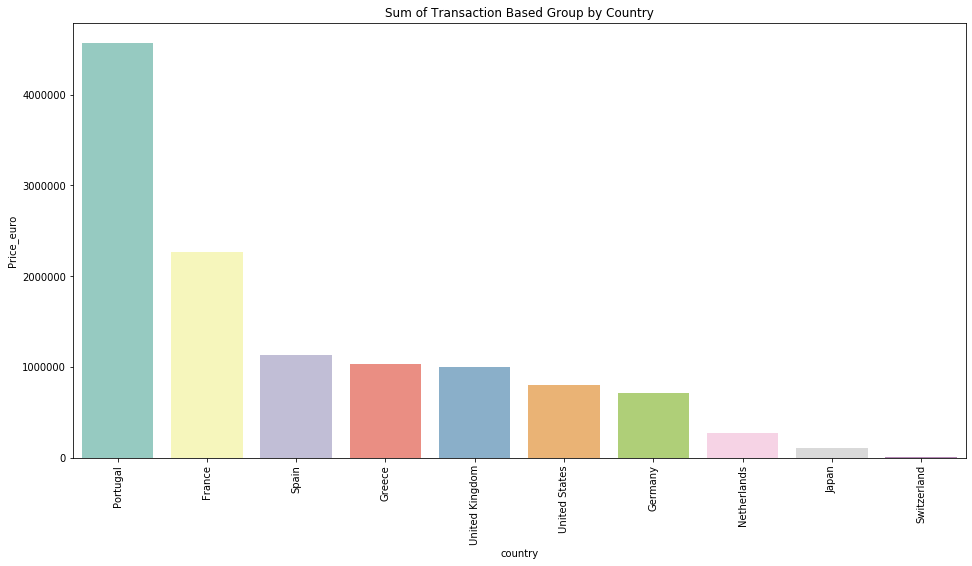

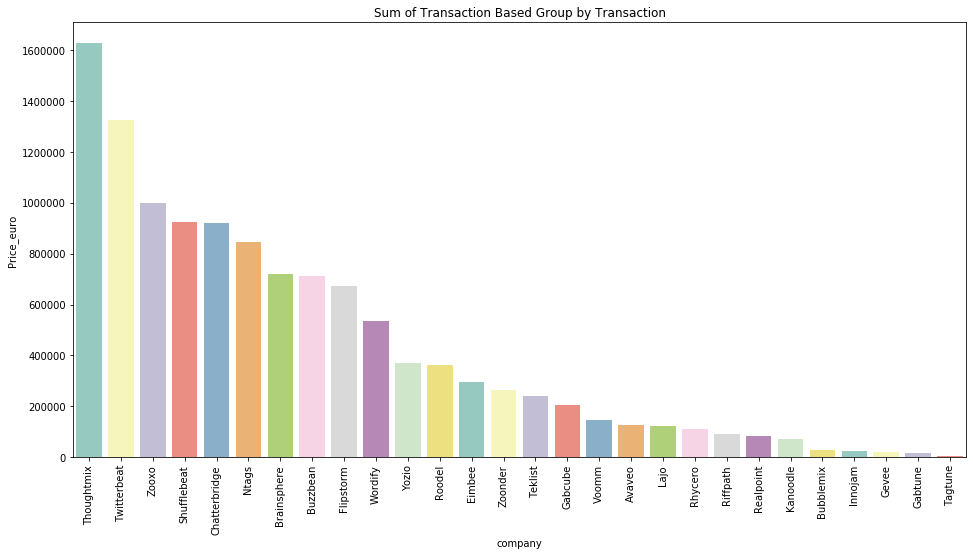

In [118]:
plot_count('country','Price_euro',"Sum of Transaction Based Group by Country", df_sum_country, size=4)
plot_count('company','Price_euro',"Sum of Transaction Based Group by Transaction", df_sum_company, size=4)

In [114]:
df_sum_country=DF.groupby("country")["Price_euro"].sum().sort_values(ascending=False).reset_index()

In [78]:
def plot_count(feature, value, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    g = sns.barplot(df[feature], df[value],  palette='Set3')
    g.set_title("Number of {}".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

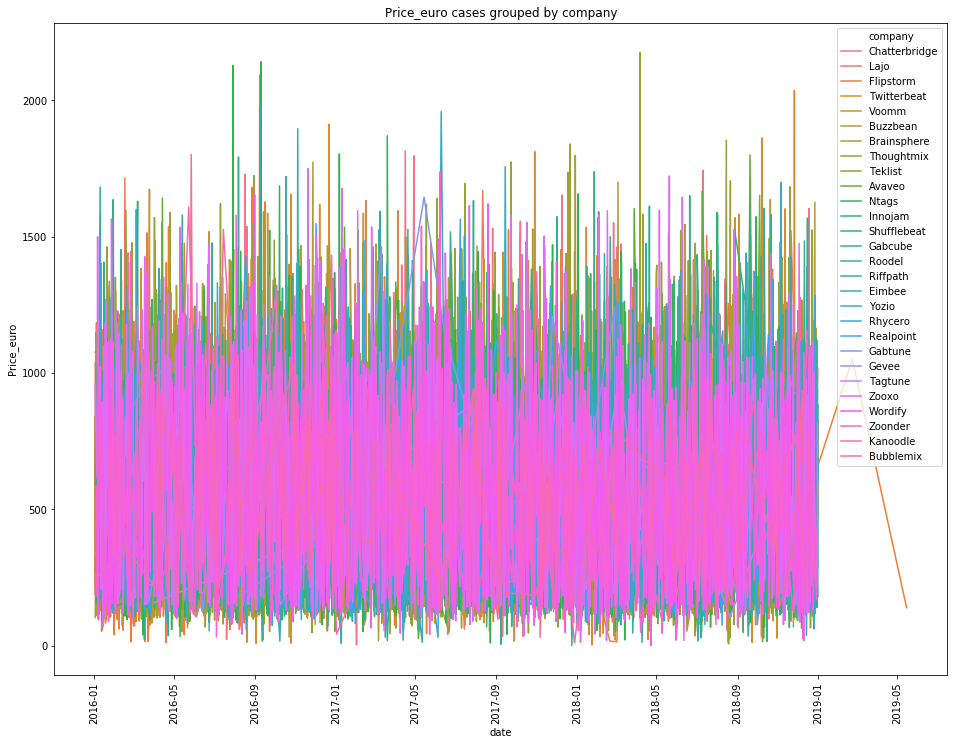

In [79]:
plot_count('company', 'Confirmed', 'Confirmed cases (last updated)', filtered_data_last, size=4)


---
## Part 3: Creating a database
Storing data in a relational database has the advantages that it is persistent, fast to query, and it will be easier access for other employees at Weyland-Yutani.

In this part you should:
- Create a database and table(s) for the data
- Insert data into the tables

You may use SQLite locally to do this. You should argue why you choose to store your data the way you do. 

In [47]:
import sqlite3
from sqlite3 import Error
 
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

In [48]:
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [49]:
def create_client(conn, client):
    """
    Create a new client into the clients table
    :param conn:
    :param client:
    :return: client id
    """
    sql = ''' INSERT INTO clients(name,country,city)
              VALUES(?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, client)
    return cur.lastrowid

In [50]:
def create_transaction(conn, transaction):
    """
    Create a new transaction into the transactions table
    :param conn:
    :param transaction:
    :return: transaction id
    """
    sql = ''' INSERT INTO transactions(number,product,amount,date,company)
              VALUES(?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, transaction)
    return cur.lastrowid

In [51]:
from datetime import datetime

In [59]:
import sqlite3
sqlite3.connect('costumer.db')

In [58]:
os.getcwd()

'C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools'

In [60]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
 
sql_create_projects_table = """ CREATE TABLE IF NOT EXISTS clients (
                                        name text NOT NULL PRIMARY KEY,
                                        country text,
                                        city text
                                    ); """
 
sql_create_tasks_table = """CREATE TABLE IF NOT EXISTS transactions (
                                    number text PRIMARY KEY,
                                    product text,
                                    amount double,
                                    date date,
                                    company text,
                                    FOREIGN KEY (company) REFERENCES clients (name)
                                );"""
 
# create a database connection
conn = create_connection(database)
 
# create tables
if conn is not None:
    # create clients table
    create_table(conn, sql_create_projects_table)
 
    # create transactions table
    create_table(conn, sql_create_tasks_table)
else:
    print("Error! cannot create the database connection.")
       

#Now lets insert the data in our tables
#First we start inserting the clients
# We get a unique row for every company to fill the companies table
df_company=DF.drop_duplicates('company')
for index,row in df_company.iterrows():
    client_command=(row['company'],row['country'],row['city'])
    client_id = create_client(conn, client_command)

      
#Now we insert the transactions
for index,row in DF.iterrows():
    transaction_command=(row['id'],row['part'],row['Price_euro'],row['date'].strftime('%Y-%m-%d'),row['company'])
    transaction_id = create_transaction(conn, transaction_command)
    
# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()
#     cur = conn.cursor()
#     cur.execute("SELECT * FROM clients")
 
#     rows = cur.fetchall()
 
#     for row in rows:
#         print(row)

In [62]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)

cur = conn.cursor()
cur.execute("SELECT * FROM transactions")
 
rows = cur.fetchall()
for row in rows:
  print(row)
  
conn.commit()
conn.close()

('0', '54868-5165', 784.79, '2016-01-02', 'Chatterbridge')
('1', '60505-2867', 187.99, '2016-01-02', 'Lajo')
('2', '24385-268', 221.73, '2016-01-02', 'Flipstorm')
('3', '76117-001', 1075.82, '2016-01-02', 'Twitterbeat')
('4', '44946-1046', 412.55, '2016-01-02', 'Chatterbridge')
('5', '16729-167', 359.52, '2016-01-02', 'Chatterbridge')
('6', '52125-444', 266.62, '2016-01-02', 'Voomm')
('7', '43419-018', 103.45, '2016-01-02', 'Buzzbean')
('8', '24286-1562', 317.65, '2016-01-02', 'Lajo')
('9', '49035-530', 841.97, '2016-01-02', 'Flipstorm')
('10', '36987-1697', 830.75, '2016-01-02', 'Brainsphere')
('11', '44946-1046', 406.4, '2016-01-02', 'Flipstorm')
('12', '51346-145', 978.51, '2016-01-02', 'Flipstorm')
('13', '51138-049', 504.69, '2016-01-02', 'Flipstorm')
('14', '0268-6107', 477.71, '2016-01-02', 'Thoughtmix')
('15', '51523-002', 1041.56, '2016-01-02', 'Flipstorm')
('16', '49288-0285', 598.52, '2016-01-02', 'Brainsphere')
('17', '68233-011', 304.59, '2016-01-03', 'Chatterbridge')
('18

('2146', '55856-0003', 685.21, '2016-04-16', 'Flipstorm')
('2147', '35356-325', 352.88, '2016-04-16', 'Buzzbean')
('2148', '54868-6311', 461.81, '2016-04-16', 'Gabcube')
('2149', '51138-049', 491.56, '2016-04-16', 'Buzzbean')
('2150', '49349-820', 739.33, '2016-04-16', 'Flipstorm')
('2151', '68084-172', 393.24, '2016-04-16', 'Eimbee')
('2152', '49288-0285', 473.76, '2016-04-16', 'Brainsphere')
('2153', '0268-1128', 783.09, '2016-04-16', 'Flipstorm')
('2154', '98132-889', 196.78, '2016-04-16', 'Roodel')
('2155', '70253-307', 933.73, '2016-04-16', 'Riffpath')
('2156', '54092-515', 774.87, '2016-04-16', 'Buzzbean')
('2157', '55154-5057', 668.43, '2016-04-16', 'Twitterbeat')
('2158', '16590-177', 736.09, '2016-04-16', 'Ntags')
('2159', '52125-444', 285.84, '2016-04-16', 'Ntags')
('2160', '0268-1128', 688.87, '2016-04-16', 'Roodel')
('2161', '0268-6107', 462.72, '2016-04-16', 'Twitterbeat')
('2162', '68462-565', 977.75, '2016-04-16', 'Ntags')
('2163', '52343-025', 701.23, '2016-04-17', 'Buz

('3996', '0699-7041', 845.15, '2016-08-03', 'Flipstorm')
('3997', '52125-444', 291.98, '2016-08-03', 'Flipstorm')
('3998', '62011-0219', 863.18, '2016-08-03', 'Thoughtmix')
('3999', '49035-530', 869.79, '2016-08-03', 'Buzzbean')
('4000', '49349-471', 980.16, '2016-08-04', 'Eimbee')
('4001', '10237-832', 714.68, '2016-08-04', 'Yozio')
('4002', '37205-992', 368.11, '2016-08-04', 'Shufflebeat')
('4003', '68462-565', 620.83, '2016-08-04', 'Roodel')
('4004', '52959-433', 352.17, '2016-08-04', 'Chatterbridge')
('4005', '68233-011', 708.07, '2016-08-04', 'Thoughtmix')
('4006', '13537-259', 941.79, '2016-08-04', 'Thoughtmix')
('4007', '76335-006', 369.87, '2016-08-04', 'Twitterbeat')
('4008', '51346-126', 129.86, '2016-08-04', 'Thoughtmix')
('4009', '51346-145', 946.43, '2016-08-04', 'Ntags')
('4010', '68084-172', 517.0, '2016-08-04', 'Twitterbeat')
('4011', '54868-6311', 584.95, '2016-08-04', 'Flipstorm')
('4012', '76454-100', 139.5, '2016-08-04', 'Teklist')
('4013', '68462-565', 785.48, '201

('5249', '52959-433', 326.47, '2016-10-17', 'Twitterbeat')
('5250', '0268-1604', 113.87, '2016-10-17', 'Twitterbeat')
('5251', '0615-7679', 450.91, '2016-10-17', 'Thoughtmix')
('5252', '52380-1102', 240.93, '2016-10-17', 'Yozio')
('5253', '55700-014', 635.19, '2016-10-17', 'Shufflebeat')
('5254', '13537-259', 701.87, '2016-10-17', 'Buzzbean')
('5255', '0228-2167', 880.1, '2016-10-17', 'Thoughtmix')
('5256', '98132-889', 243.73, '2016-10-17', 'Shufflebeat')
('5257', '51060-032', 934.22, '2016-10-17', 'Eimbee')
('5258', '55700-014', 638.15, '2016-10-17', 'Twitterbeat')
('5259', '55856-0003', 119.13, '2016-10-17', 'Ntags')
('5260', '54473-578', 193.2, '2016-10-17', 'Thoughtmix')
('5261', '50458-560', 280.53, '2016-10-17', 'Ntags')
('5262', '54868-5165', 1720.09, '2016-10-17', 'Eimbee')
('5263', '37205-992', 839.16, '2016-10-17', 'Ntags')
('5264', '0268-1401', 839.01, '2016-10-17', 'Gabcube')
('5265', '0603-6134', 815.9, '2016-10-17', 'Thoughtmix')
('5266', '0268-1128', 1047.38, '2016-10-1

('6455', '62742-4030', 514.12, '2016-12-28', 'Thoughtmix')
('6456', '62670-4404', 338.47, '2016-12-28', 'Ntags')
('6457', '49288-0655', 147.62, '2016-12-28', 'Shufflebeat')
('6458', '68462-565', 871.98, '2016-12-29', 'Ntags')
('6459', '65044-3014', 947.67, '2016-12-29', 'Eimbee')
('6460', '10578-049', 1082.89, '2016-12-29', 'Ntags')
('6461', '52125-444', 284.99, '2016-12-29', 'Ntags')
('6462', '54973-9150', 1171.66, '2016-12-29', 'Thoughtmix')
('6463', '68462-565', 1018.59, '2016-12-29', 'Twitterbeat')
('6464', '62011-0219', 779.22, '2016-12-29', 'Ntags')
('6465', '10237-832', 547.08, '2016-12-29', 'Thoughtmix')
('6466', '51346-145', 974.5, '2016-12-29', 'Thoughtmix')
('6467', '52125-444', 283.09, '2016-12-29', 'Thoughtmix')
('6468', '36987-1697', 1368.39, '2016-12-29', 'Ntags')
('6469', '70253-307', 878.89, '2016-12-29', 'Chatterbridge')
('6470', '51523-002', 806.82, '2016-12-30', 'Brainsphere')
('6471', '48951-4042', 105.81, '2016-12-30', 'Thoughtmix')
('6472', '43419-018', 213.42, '

('7750', '68084-595', 260.89, '2017-03-23', 'Roodel')
('7751', '58118-5060', 166.98, '2017-03-23', 'Gabcube')
('7752', '67046-030', 150.13, '2017-03-23', 'Gabcube')
('7753', '37205-992', 631.15, '2017-03-23', 'Teklist')
('7754', '36987-1697', 1192.27, '2017-03-23', 'Twitterbeat')
('7755', '52125-444', 281.5, '2017-03-24', 'Ntags')
('7756', '44946-1046', 398.8, '2017-03-24', 'Chatterbridge')
('7757', '13537-259', 582.21, '2017-03-24', 'Buzzbean')
('7758', '68462-565', 1050.75, '2017-03-24', 'Thoughtmix')
('7759', '49349-820', 609.02, '2017-03-24', 'Thoughtmix')
('7760', '65044-3014', 720.32, '2017-03-24', 'Chatterbridge')
('7761', '0268-1401', 755.0, '2017-03-24', 'Brainsphere')
('7762', '54868-5165', 123.41, '2017-03-24', 'Lajo')
('7763', '0603-6134', 745.05, '2017-03-24', 'Brainsphere')
('7764', '76314-002', 450.61, '2017-03-24', 'Roodel')
('7765', '10267-2529', 477.69, '2017-03-24', 'Buzzbean')
('7766', '49999-737', 870.66, '2017-03-25', 'Rhycero')
('7767', '54868-0823', 157.19, '201

('9656', '65044-3014', 832.19, '2017-07-29', 'Roodel')
('9657', '0615-7679', 420.92, '2017-07-29', 'Buzzbean')
('9658', '62011-0219', 833.79, '2017-07-29', 'Teklist')
('9659', '67544-356', 481.42, '2017-07-29', 'Chatterbridge')
('9660', '0268-1128', 1084.19, '2017-07-29', 'Voomm')
('9661', '76117-001', 912.05, '2017-07-29', 'Avaveo')
('9662', '48951-4042', 212.42, '2017-07-29', 'Shufflebeat')
('9663', '55856-0003', 669.9, '2017-07-29', 'Teklist')
('9664', '13537-259', 558.85, '2017-07-29', 'Twitterbeat')
('9665', '54973-9150', 881.54, '2017-07-29', 'Shufflebeat')
('9666', '41163-428', 109.83, '2017-07-29', 'Brainsphere')
('9667', '51346-126', 154.04, '2017-07-29', 'Roodel')
('9668', '68462-565', 1053.69, '2017-07-29', 'Roodel')
('9669', '49349-106', 306.75, '2017-07-29', 'Chatterbridge')
('9670', '58118-5060', 321.26, '2017-07-30', 'Buzzbean')
('9671', '49288-0655', 113.68, '2017-07-30', 'Twitterbeat')
('9672', '54092-515', 768.35, '2017-07-30', 'Twitterbeat')
('9673', '68084-172', 376

('11188', '49349-471', 986.4, '2017-11-11', 'Twitterbeat')
('11189', '61398-0828', 445.25, '2017-11-11', 'Twitterbeat')
('11190', '67046-030', 174.21, '2017-11-11', 'Eimbee')
('11191', '0228-2167', 239.36, '2017-11-11', 'Twitterbeat')
('11192', '51060-032', 1009.48, '2017-11-11', 'Ntags')
('11193', '54473-578', 156.87, '2017-11-11', 'Shufflebeat')
('11194', '49349-471', 799.91, '2017-11-12', 'Brainsphere')
('11195', '51138-049', 444.81, '2017-11-12', 'Eimbee')
('11196', '49967-724', 546.79, '2017-11-12', 'Thoughtmix')
('11197', '49349-106', 819.5, '2017-11-12', 'Buzzbean')
('11198', '52125-136', 543.41, '2017-11-12', 'Riffpath')
('11199', '0615-7679', 338.87, '2017-11-12', 'Teklist')
('11200', '67544-356', 611.69, '2017-11-12', 'Teklist')
('11201', '54868-0823', 114.4, '2017-11-12', 'Shufflebeat')
('11202', '10267-2529', 554.66, '2017-11-12', 'Buzzbean')
('11203', '0268-1604', 128.34, '2017-11-12', 'Buzzbean')
('11204', '13537-259', 833.63, '2017-11-12', 'Rhycero')
('11205', '35356-325

('13024', '0228-2167', 538.06, '2018-03-19', 'Ntags')
('13025', '49349-106', 408.57, '2018-03-19', 'Thoughtmix')
('13026', '49520-501', 751.89, '2018-03-19', 'Tagtune')
('13027', '0699-7041', 648.87, '2018-03-19', 'Roodel')
('13028', '54868-0823', 164.81, '2018-03-19', 'Buzzbean')
('13029', '68752-024', 856.24, '2018-03-19', 'Shufflebeat')
('13030', '52343-025', 705.25, '2018-03-19', 'Yozio')
('13031', '41163-428', 125.7, '2018-03-19', 'Thoughtmix')
('13032', '37205-992', 611.9, '2018-03-19', 'Avaveo')
('13033', '49349-842', 178.61, '2018-03-19', 'Twitterbeat')
('13034', '49348-574', 350.62, '2018-03-19', 'Flipstorm')
('13035', '55289-164', 462.9, '2018-03-19', 'Thoughtmix')
('13036', '54973-9150', 1106.19, '2018-03-19', 'Ntags')
('13037', '61398-0828', 340.54, '2018-03-19', 'Roodel')
('13038', '67046-030', 181.63, '2018-03-20', 'Chatterbridge')
('13039', '58596-001', 445.39, '2018-03-20', 'Ntags')
('13040', '21695-931', 767.6, '2018-03-20', 'Roodel')
('13041', '16729-167', 436.85, '20

('15074', '70253-307', 942.01, '2018-08-04', 'Twitterbeat')
('15075', '76314-002', 461.69, '2018-08-05', 'Twitterbeat')
('15076', '63629-2733', 245.38, '2018-08-05', 'Buzzbean')
('15077', '50563-113', 647.19, '2018-08-05', 'Yozio')
('15078', '0699-7041', 1013.71, '2018-08-05', 'Shufflebeat')
('15079', '0268-1604', 141.33, '2018-08-05', 'Ntags')
('15080', '10267-2529', 541.03, '2018-08-05', 'Twitterbeat')
('15081', '51060-032', 1210.46, '2018-08-05', 'Ntags')
('15082', '37205-992', 687.85, '2018-08-05', 'Brainsphere')
('15083', '16590-177', 962.86, '2018-08-05', 'Twitterbeat')
('15084', '51346-145', 958.53, '2018-08-05', 'Gabcube')
('15085', '0185-0373', 935.31, '2018-08-05', 'Buzzbean')
('15086', '13537-259', 769.04, '2018-08-05', 'Eimbee')
('15087', '17156-617', 1026.91, '2018-08-05', 'Chatterbridge')
('15088', '51346-145', 1013.48, '2018-08-05', 'Twitterbeat')
('15089', '51079-947', 727.32, '2018-08-05', 'Thoughtmix')
('15090', '54473-578', 200.35, '2018-08-05', 'Ntags')
('15091', '0

('17322', '76335-006', 319.40240337772, '2016-02-06', 'Zooxo')
('17323', '49967-724', 519.6102630724262, '2016-02-06', 'Zooxo')
('17324', '62011-0219', 1146.9827866190321, '2016-02-07', 'Zooxo')
('17325', '76454-100', 180.00649561545956, '2016-02-07', 'Zooxo')
('17326', '60505-2867', 203.7975495541728, '2016-02-09', 'Zooxo')
('17327', '35356-325', 615.2415164539099, '2016-02-09', 'Zooxo')
('17328', '0699-7041', 1002.6044005388416, '2016-02-09', 'Zooxo')
('17329', '42254-213', 286.7791391365707, '2016-02-09', 'Zooxo')
('17330', '62011-0219', 871.5859714463068, '2016-02-10', 'Zooxo')
('17331', '70253-307', 881.2166624333249, '2016-02-11', 'Zooxo')
('17332', '68752-024', 909.4230398147554, '2016-02-12', 'Zooxo')
('17333', '54092-515', 891.4002701485816, '2016-02-13', 'Zooxo')
('17334', '37205-951', 120.78214446517013, '2016-02-13', 'Zooxo')
('17335', '62756-707', 180.22769666173537, '2016-02-14', 'Zooxo')
('17336', '16714-295', 452.020725388601, '2016-02-15', 'Zooxo')
('17337', '51060-032

('18444', '67544-356', 600.1933136229247, '2018-02-25', 'Zooxo')
('18445', '54868-5165', 310.2140742427693, '2018-02-26', 'Zooxo')
('18446', '49349-314', 491.8241858346618, '2018-02-26', 'Zooxo')
('18447', '49349-471', 924.2420814479638, '2018-02-27', 'Zooxo')
('18448', '54868-0823', 145.9389140271493, '2018-02-27', 'Zooxo')
('18449', '54092-515', 774.1855203619909, '2018-02-27', 'Zooxo')
('18450', '51346-126', 102.36950743652096, '2018-02-28', 'Zooxo')
('18451', '54868-5165', 484.6701310438319, '2018-03-01', 'Zooxo')
('18452', '68180-121', 1059.9751468594668, '2018-03-01', 'Zooxo')
('18453', '24286-1562', 253.10120913569187, '2018-03-02', 'Zooxo')
('18454', '61398-0828', 312.4608150470219, '2018-03-02', 'Zooxo')
('18455', '51346-145', 983.564711150918, '2018-03-03', 'Zooxo')
('18456', '52380-1102', 513.1101656963726, '2018-03-04', 'Zooxo')
('18457', '49520-501', 791.6470191983833, '2018-03-05', 'Zooxo')
('18458', '16714-295', 492.87077579431906, '2018-03-05', 'Zooxo')
('18459', '16714

('20420', '0268-1128', 1208.6852812449345, '2016-12-17', 'Kanoodle')
('20421', '37205-951', 291.89886354345515, '2016-12-21', 'Kanoodle')
('20422', '0699-7041', 870.2539151712888, '2016-12-24', 'Bubblemix')
('20423', '68462-565', 612.7965742251224, '2016-12-24', 'Kanoodle')
('20424', '50458-560', 42.61385737439222, '2017-01-01', 'Kanoodle')
('20425', '51523-002', 439.6420501064352, '2017-01-11', 'Bubblemix')
('20426', '67046-030', 142.5620551419455, '2017-01-19', 'Kanoodle')
('20427', '49349-106', 437.18469829345963, '2017-01-20', 'Kanoodle')
('20428', '65044-3014', 796.6010893423298, '2017-01-29', 'Kanoodle')
('20429', '0615-7679', 368.92212701612897, '2017-02-25', 'Bubblemix')
('20430', '51138-049', 750.9022029372496, '2017-03-01', 'Bubblemix')
('20431', '49738-105', 411.3661206683678, '2017-03-17', 'Kanoodle')
('20432', '16477-306', 993.7677998189153, '2017-03-19', 'Kanoodle')
('20433', '36987-1697', 476.2645123677855, '2017-03-22', 'Kanoodle')
('20434', '49035-530', 1188.2410355227

---
## Part 4: Analyzing the data
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data. For each question, you should state why it is relevant and what you expect to find.

To get you started, you should prepare answers to the following questions. You should add more questions.
#### Who are the most profitable clients?
Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources.

#### Are there any clients for which profit is declining?
Declining profit from a specific client may indicate that the client is disatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn.


Remember, you are taking this to your new boss, so think about how you present the data.

In [63]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)
#Who are the most profitable clients?
#Lets short the clients by amount desc
cur = conn.cursor()
cur.execute("SELECT * FROM (SELECT company, SUM(amount) AS amount FROM transactions GROUP BY company) ORDER BY amount DESC")
 
rows = cur.fetchall()
for row in rows:
  print(row)
print(len(rows))

  
conn.commit()
conn.close()

('Thoughtmix', 1626805.1600000015)
('Twitterbeat', 1325104.0200000033)
('Zooxo', 998668.6800647781)
('Shufflebeat', 922924.7199999999)
('Chatterbridge', 921110.8999999994)
('Ntags', 846252.5499999991)
('Brainsphere', 720802.9399999991)
('Buzzbean', 713758.4299999992)
('Flipstorm', 673246.2099999991)
('Wordify', 535510.4807126565)
('Yozio', 368655.4100000002)
('Roodel', 362089.7599999997)
('Eimbee', 295001.94999999984)
('Zoonder', 263428.6677016085)
('Teklist', 241354.28)
('Gabcube', 204489.94999999998)
('Voomm', 144799.98)
('Avaveo', 126505.0700000001)
('Lajo', 122119.52999999997)
('Rhycero', 112883.34000000004)
('Riffpath', 90550.25000000007)
('Realpoint', 85333.36999999995)
('Kanoodle', 72615.43307126628)
('Bubblemix', 27476.052162117077)
('Innojam', 25539.63)
('Gevee', 22549.16)
('Gabtune', 18359.269999999997)
('Tagtune', 6579.640000000001)
28


In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
from matplotlib import style

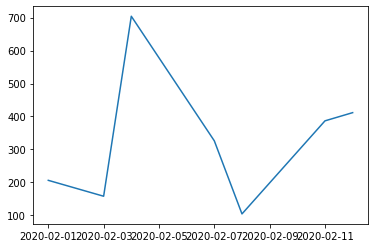

In [65]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)

#Are there any clients for which profit is declining?
cur = conn.cursor()
cur.execute("SELECT month, amount FROM (SELECT strftime('%m', date) as month, amount FROM transactions WHERE company='Tagtune' ORDER BY date ASC) GROUP BY month")
 
dates = []
values = []

rows = cur.fetchall()
for row in rows:
  #print(row)
  dates.append(parser.parse(row[0]))
  values.append(row[1])

plt.plot_date(dates,values,'-')
plt.show()

  
conn.commit()
conn.close()

---
## Part 5: Performance
Your boss is very impressed with what you have achieved in less than two weeks, and he would like to take your idea of storing the customer and sales data in a relational database to production. However, John is concerned that the solution will not scale. His experience is telling him that you will see many occurrences of the following queries.

- Show all sales to company X between time $t_1$ and time $t_2$
- Show the latest X sales in the database
- Show total sales per company per day

Show that Johns concern is not justified.

In [66]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)

#Show all sales to company X between time  t1  and time  t2
cur = conn.cursor()
cur.execute("SELECT * FROM transactions WHERE company='Yozio' AND date>='2018-12-23' AND date<='2018-12-26'")
 
rows = cur.fetchall()
for row in rows:
  print(row)
print(len(rows))

  
conn.commit()
conn.close()

('17133', '49349-471', 833.06, '2018-12-23', 'Yozio')
('17134', '51523-002', 731.64, '2018-12-23', 'Yozio')
('17149', '48951-4042', 207.71, '2018-12-23', 'Yozio')
('17179', '48951-4042', 61.59, '2018-12-25', 'Yozio')
4


In [67]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)


#Show the latest X sales in the database
cur = conn.cursor()
cur.execute("SELECT * FROM transactions ORDER BY date DESC LIMIT 10")
 
rows = cur.fetchall()
for row in rows:
  print(row)
print(len(rows))
  
conn.commit()
conn.close()

('17265', '43419-018', 139.56, '2019-05-14', 'Flipstorm')
('17264', '49288-0285', 1051.08, '2019-02-21', 'Flipstorm')
('17251', '0699-7041', 665.3, '2018-12-31', 'Twitterbeat')
('17252', '68180-121', 936.06, '2018-12-31', 'Rhycero')
('17253', '51060-032', 378.98, '2018-12-31', 'Buzzbean')
('17254', '0268-6107', 477.59, '2018-12-31', 'Thoughtmix')
('17255', '68180-121', 637.5, '2018-12-31', 'Twitterbeat')
('17256', '13537-259', 762.29, '2018-12-31', 'Thoughtmix')
('17257', '36800-952', 286.23, '2018-12-31', 'Gabcube')
('17258', '36987-1697', 1017.44, '2018-12-31', 'Chatterbridge')
10


In [68]:
database = r"C:\\Users\\PeymanKor\\OneDrive - Danmarks Tekniske Universitet\\DTU Courses\\Computational Tools\costumer.db"
conn = create_connection(database)

#Show total sales per company per day
cur = conn.cursor()
cur.execute("SELECT company,DATE(date), SUM(amount) FROM transactions GROUP BY company,DATE(date)")

  
rows = cur.fetchall()
for row in rows:
  print(row)
print(len(rows))

  
conn.commit()
conn.close()

('Avaveo', '2016-01-03', 1029.92)
('Avaveo', '2016-01-06', 687.63)
('Avaveo', '2016-01-18', 358.46)
('Avaveo', '2016-01-19', 474.35)
('Avaveo', '2016-02-01', 138.41)
('Avaveo', '2016-02-11', 732.99)
('Avaveo', '2016-02-20', 750.87)
('Avaveo', '2016-03-07', 383.81)
('Avaveo', '2016-03-08', 878.69)
('Avaveo', '2016-03-18', 499.3)
('Avaveo', '2016-03-20', 164.32)
('Avaveo', '2016-03-22', 860.98)
('Avaveo', '2016-04-02', 359.37)
('Avaveo', '2016-04-12', 465.26)
('Avaveo', '2016-04-13', 1641.33)
('Avaveo', '2016-04-14', 461.45)
('Avaveo', '2016-04-18', 640.15)
('Avaveo', '2016-05-10', 103.15)
('Avaveo', '2016-05-12', 1007.23)
('Avaveo', '2016-05-13', 463.18)
('Avaveo', '2016-05-20', 1209.85)
('Avaveo', '2016-05-27', 167.81)
('Avaveo', '2016-06-11', 1035.93)
('Avaveo', '2016-06-16', 862.96)
('Avaveo', '2016-07-03', 761.28)
('Avaveo', '2016-07-08', 739.89)
('Avaveo', '2016-07-10', 809.66)
('Avaveo', '2016-07-17', 141.95)
('Avaveo', '2016-07-20', 1158.06)
('Avaveo', '2016-07-25', 903.4)
('Avav

('Buzzbean', '2018-01-14', 1197.65)
('Buzzbean', '2018-01-15', 967.41)
('Buzzbean', '2018-01-17', 199.58)
('Buzzbean', '2018-01-18', 120.13)
('Buzzbean', '2018-01-19', 696.79)
('Buzzbean', '2018-01-20', 934.15)
('Buzzbean', '2018-01-21', 385.51)
('Buzzbean', '2018-01-22', 387.2)
('Buzzbean', '2018-01-23', 307.64)
('Buzzbean', '2018-01-24', 1270.76)
('Buzzbean', '2018-01-26', 943.14)
('Buzzbean', '2018-01-27', 331.55)
('Buzzbean', '2018-01-29', 297.57)
('Buzzbean', '2018-01-30', 796.68)
('Buzzbean', '2018-01-31', 706.13)
('Buzzbean', '2018-02-01', 1705.42)
('Buzzbean', '2018-02-02', 1276.19)
('Buzzbean', '2018-02-03', 2509.96)
('Buzzbean', '2018-02-05', 720.92)
('Buzzbean', '2018-02-07', 760.35)
('Buzzbean', '2018-02-09', 940.4)
('Buzzbean', '2018-02-10', 740.3)
('Buzzbean', '2018-02-13', 794.88)
('Buzzbean', '2018-02-14', 569.97)
('Buzzbean', '2018-02-15', 1391.49)
('Buzzbean', '2018-02-16', 1109.71)
('Buzzbean', '2018-02-17', 427.22)
('Buzzbean', '2018-02-18', 581.74)
('Buzzbean', '20

('Flipstorm', '2016-02-21', 610.4399999999999)
('Flipstorm', '2016-02-22', 1364.5)
('Flipstorm', '2016-02-23', 1452.71)
('Flipstorm', '2016-02-24', 4080.9700000000003)
('Flipstorm', '2016-02-25', 474.88)
('Flipstorm', '2016-02-26', 3025.7200000000003)
('Flipstorm', '2016-02-27', 2544.66)
('Flipstorm', '2016-02-28', 3174.85)
('Flipstorm', '2016-02-29', 5203.09)
('Flipstorm', '2016-03-01', 2697.0899999999997)
('Flipstorm', '2016-03-02', 1192.53)
('Flipstorm', '2016-03-03', 2349.22)
('Flipstorm', '2016-03-04', 2663.35)
('Flipstorm', '2016-03-05', 289.84)
('Flipstorm', '2016-03-06', 3013.48)
('Flipstorm', '2016-03-07', 3398.1499999999996)
('Flipstorm', '2016-03-08', 2861.83)
('Flipstorm', '2016-03-09', 2034.17)
('Flipstorm', '2016-03-10', 3319.21)
('Flipstorm', '2016-03-11', 2459.8599999999997)
('Flipstorm', '2016-03-12', 1467.51)
('Flipstorm', '2016-03-13', 1497.61)
('Flipstorm', '2016-03-14', 1858.2999999999997)
('Flipstorm', '2016-03-15', 3781.7900000000004)
('Flipstorm', '2016-03-16', 

('Ntags', '2016-12-28', 338.47)
('Ntags', '2016-12-29', 4387.47)
('Ntags', '2016-12-30', 1515.8600000000001)
('Ntags', '2016-12-31', 2693.93)
('Ntags', '2017-01-01', 185.5)
('Ntags', '2017-01-02', 1099.95)
('Ntags', '2017-01-03', 1252.9)
('Ntags', '2017-01-05', 1308.17)
('Ntags', '2017-01-06', 2097.48)
('Ntags', '2017-01-07', 159.49)
('Ntags', '2017-01-09', 1894.14)
('Ntags', '2017-01-10', 1980.78)
('Ntags', '2017-01-11', 260.51)
('Ntags', '2017-01-13', 820.34)
('Ntags', '2017-01-14', 1012.73)
('Ntags', '2017-01-15', 1393.94)
('Ntags', '2017-01-16', 395.90999999999997)
('Ntags', '2017-01-18', 623.87)
('Ntags', '2017-01-19', 877.98)
('Ntags', '2017-01-20', 469.86)
('Ntags', '2017-01-21', 1198.59)
('Ntags', '2017-01-25', 1276.6399999999999)
('Ntags', '2017-01-26', 761.72)
('Ntags', '2017-01-27', 140.77)
('Ntags', '2017-01-29', 2043.77)
('Ntags', '2017-02-01', 570.39)
('Ntags', '2017-02-02', 1482.19)
('Ntags', '2017-02-03', 1995.3300000000002)
('Ntags', '2017-02-04', 2068.24)
('Ntags', '2

('Roodel', '2017-05-06', 564.41)
('Roodel', '2017-05-07', 1051.48)
('Roodel', '2017-05-09', 947.62)
('Roodel', '2017-05-13', 382.36)
('Roodel', '2017-05-15', 921.06)
('Roodel', '2017-05-17', 1003.49)
('Roodel', '2017-05-18', 694.02)
('Roodel', '2017-05-19', 1014.6)
('Roodel', '2017-05-20', 1256.63)
('Roodel', '2017-05-25', 484.81)
('Roodel', '2017-05-28', 193.8)
('Roodel', '2017-05-30', 212.84)
('Roodel', '2017-05-31', 206.91)
('Roodel', '2017-06-01', 487.94)
('Roodel', '2017-06-02', 292.15)
('Roodel', '2017-06-03', 784.29)
('Roodel', '2017-06-04', 1057.14)
('Roodel', '2017-06-06', 994.05)
('Roodel', '2017-06-08', 1680.0300000000002)
('Roodel', '2017-06-11', 338.08)
('Roodel', '2017-06-18', 618.63)
('Roodel', '2017-06-21', 859.22)
('Roodel', '2017-06-23', 563.72)
('Roodel', '2017-06-29', 727.41)
('Roodel', '2017-06-30', 339.72)
('Roodel', '2017-07-01', 275.11)
('Roodel', '2017-07-04', 282.25)
('Roodel', '2017-07-08', 1314.83)
('Roodel', '2017-07-09', 419.14)
('Roodel', '2017-07-10', 83

('Teklist', '2017-01-10', 518.99)
('Teklist', '2017-01-12', 795.27)
('Teklist', '2017-01-13', 399.86)
('Teklist', '2017-01-15', 499.4)
('Teklist', '2017-01-17', 342.43)
('Teklist', '2017-01-18', 505.19)
('Teklist', '2017-01-22', 227.85)
('Teklist', '2017-01-24', 1155.55)
('Teklist', '2017-01-30', 496.66)
('Teklist', '2017-01-31', 564.53)
('Teklist', '2017-02-02', 268.82)
('Teklist', '2017-02-03', 1057.56)
('Teklist', '2017-02-06', 409.38)
('Teklist', '2017-02-08', 349.97)
('Teklist', '2017-02-09', 380.24)
('Teklist', '2017-02-13', 976.58)
('Teklist', '2017-02-15', 702.55)
('Teklist', '2017-02-22', 479.63)
('Teklist', '2017-02-28', 610.45)
('Teklist', '2017-03-01', 1192.53)
('Teklist', '2017-03-04', 1810.91)
('Teklist', '2017-03-06', 324.82)
('Teklist', '2017-03-14', 1033.09)
('Teklist', '2017-03-15', 386.98)
('Teklist', '2017-03-17', 858.08)
('Teklist', '2017-03-21', 1016.2)
('Teklist', '2017-03-23', 631.15)
('Teklist', '2017-03-27', 413.30999999999995)
('Teklist', '2017-04-09', 775.56

('Twitterbeat', '2016-04-13', 1378.78)
('Twitterbeat', '2016-04-14', 653.46)
('Twitterbeat', '2016-04-15', 1142.26)
('Twitterbeat', '2016-04-16', 1923.06)
('Twitterbeat', '2016-04-17', 863.04)
('Twitterbeat', '2016-04-18', 220.09)
('Twitterbeat', '2016-04-19', 289.59)
('Twitterbeat', '2016-04-20', 1980.46)
('Twitterbeat', '2016-04-21', 329.82)
('Twitterbeat', '2016-04-22', 2379.8999999999996)
('Twitterbeat', '2016-04-23', 144.46)
('Twitterbeat', '2016-04-24', 802.1)
('Twitterbeat', '2016-04-25', 2896.25)
('Twitterbeat', '2016-04-26', 680.1)
('Twitterbeat', '2016-04-28', 848.84)
('Twitterbeat', '2016-04-30', 1360.58)
('Twitterbeat', '2016-05-01', 1527.46)
('Twitterbeat', '2016-05-02', 107.66)
('Twitterbeat', '2016-05-03', 1003.97)
('Twitterbeat', '2016-05-04', 1371.79)
('Twitterbeat', '2016-05-05', 1074.24)
('Twitterbeat', '2016-05-06', 1104.85)
('Twitterbeat', '2016-05-08', 106.89)
('Twitterbeat', '2016-05-09', 1275.19)
('Twitterbeat', '2016-05-10', 167.48)
('Twitterbeat', '2016-05-11'

('Yozio', '2017-10-15', 350.28)
('Yozio', '2017-10-18', 1416.31)
('Yozio', '2017-10-20', 932.5799999999999)
('Yozio', '2017-10-23', 150.57)
('Yozio', '2017-10-25', 921.87)
('Yozio', '2017-10-26', 285.8)
('Yozio', '2017-10-28', 281.45)
('Yozio', '2017-10-31', 2192.35)
('Yozio', '2017-11-07', 602.36)
('Yozio', '2017-11-08', 1240.6)
('Yozio', '2017-11-09', 1857.73)
('Yozio', '2017-11-15', 387.05)
('Yozio', '2017-11-18', 1277.48)
('Yozio', '2017-11-19', 119.8)
('Yozio', '2017-11-22', 385.62)
('Yozio', '2017-11-23', 558.03)
('Yozio', '2017-11-26', 335.85)
('Yozio', '2017-12-01', 1610.43)
('Yozio', '2017-12-03', 765.03)
('Yozio', '2017-12-04', 386.09)
('Yozio', '2017-12-05', 704.22)
('Yozio', '2017-12-07', 872.59)
('Yozio', '2017-12-08', 495.77)
('Yozio', '2017-12-09', 542.08)
('Yozio', '2017-12-11', 1906.51)
('Yozio', '2017-12-13', 465.35)
('Yozio', '2017-12-19', 472.95)
('Yozio', '2017-12-20', 1828.38)
('Yozio', '2017-12-21', 248.02)
('Yozio', '2017-12-25', 1712.3)
('Yozio', '2017-12-28', 

('Zooxo', '2018-08-04', 2111.3756316676026)
('Zooxo', '2018-08-06', 744.4556451612902)
('Zooxo', '2018-08-07', 2036.6326564822366)
('Zooxo', '2018-08-08', 1423.222512071932)
('Zooxo', '2018-08-09', 1644.207249277296)
('Zooxo', '2018-08-10', 1005.3638137719541)
('Zooxo', '2018-08-11', 1140.763869528854)
('Zooxo', '2018-08-12', 852.667967660998)
('Zooxo', '2018-08-13', 837.3558714877421)
('Zooxo', '2018-08-14', 890.7166853303471)
('Zooxo', '2018-08-15', 881.6560080780882)
('Zooxo', '2018-08-16', 1286.2075130170506)
('Zooxo', '2018-08-17', 206.98855707507673)
('Zooxo', '2018-08-18', 2188.434272955624)
('Zooxo', '2018-08-20', 254.74418292764702)
('Zooxo', '2018-08-21', 3050.991753955873)
('Zooxo', '2018-08-22', 477.5375856240548)
('Zooxo', '2018-08-23', 473.31938850441713)
('Zooxo', '2018-08-25', 746.6629711751664)
('Zooxo', '2018-08-26', 2535.2549889135257)
('Zooxo', '2018-08-27', 1177.6130138881206)
('Zooxo', '2018-08-30', 2475.2556875153186)
('Zooxo', '2018-08-31', 1256.763984845108)
('